<a href="https://colab.research.google.com/github/Shk-tech/my-colab-learning-material/blob/main/2507_korea_ml_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 지도학습-비지도학습
# 배치학습-온라인학습
# 분류(classification)    - 회귀(regression)
# 여러 개의 카테고리 중 하나 - 온도, 각도, 위치... 연속적인 값을 추정
# 선형회귀...
# sklearn을 이용... 분류..

# MNIST...

In [ ]:
from sklearn.datasets import fetch_openml

# 사이킷런 1.2에서 추가된 parser 매개변수 기본값이 1.4 버전에서 'liac-arff'에서 'auto'로 바뀝니다.
# 'auto'일 경우 희소한 ARFF 포맷일 때는 'liac-arff', 그렇지 않을 때는 'pandas'가 됩니다.
# 이에 대한 경고를 피하려면 parser='auto'로 지정하세요.
mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

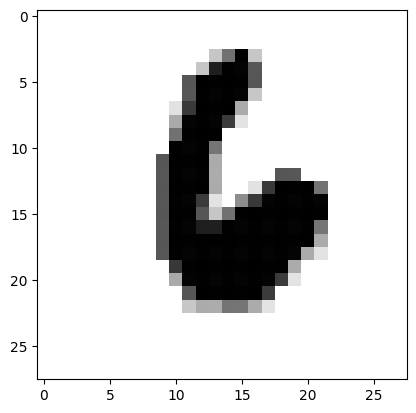

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[11000].reshape(28, 28), cmap='binary')

In [ ]:
a = [[10, 20], [10, 20], [10, 20], [10, 20], [10, 20]] # 5, 2
X#70000, 784
X[:10].shape # 10, 784

(10, 784)

In [ ]:
x_train = X[:60000] # 60000, 784
y_train = y[:60000].astype(int) # 60000,
x_valid = X[60000:] # 10000, 784
y_valid = y[60000:].astype(int) # 10000,

In [ ]:
# from sklearn.svm import SVC #support vector machine
# svc = SVC()
# svc.fit(x_train, y_train)

In [ ]:
y_train.shape

(60000,)

In [ ]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(x_train, y_train)

RidgeClassifier()

In [ ]:
model.predict(x_valid[:10]) #(N, 784) -> (N,)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

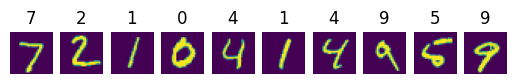

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title(y_valid[i])
    plt.axis('off')
    plt.imshow(x_valid[i].reshape(28, 28))

In [ ]:
# 성능평가 accuracy (정확도)
pred = model.predict(x_valid) # pred.shape
(pred == y_valid).mean()

np.float64(0.8603)

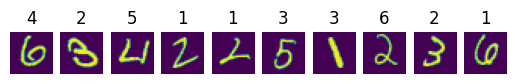

In [ ]:
failed = x_valid[~(pred == y_valid)]
failed_pred = pred[~(pred == y_valid)]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title(failed_pred[i])
    plt.axis('off')
    plt.imshow(failed[i].reshape(28, 28))

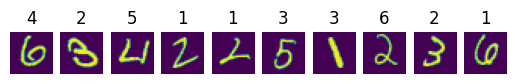

In [ ]:
fig, axes = plt.subplots(1, 10)
for i in range(10):
    ax = axes[i]
    ax.set_title(failed_pred[i])
    ax.axis('off')
    ax.imshow(failed[i].reshape(28, 28))

# Binary Classification

In [ ]:
# positive (양성) - 관심 대상 - 찾으려는 것
# True or 1
# negative (음성) - 관심 밖의 대상
# False or 0

# 숫자 5 - pos... 나머지 neg
y_train_5 = y_train == 5
y_valid_5 = y_valid == 5

In [ ]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(x_train, y_train_5)

RidgeClassifier()

In [ ]:
# train accuracy
pred = model.predict(x_train)
t_acc = (pred == y_train_5).mean()
# valid accuracy
pred = model.predict(x_valid)
v_acc = (pred == y_valid_5).mean()
t_acc, v_acc

(np.float64(0.9444333333333333), np.float64(0.9465))

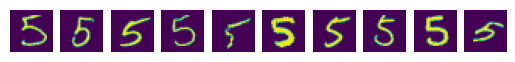

In [ ]:
pred = model.predict(x_valid)
failed = x_valid[~(pred == y_valid_5)]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    # plt.title(failed_pred[i])
    plt.axis('off')
    plt.imshow(failed[i].reshape(28, 28))

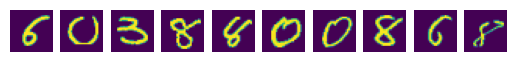

In [ ]:
x_valid, #10000, 784
cond1 = y_valid_5 == False
cond2 = pred == True
failed = x_valid[cond1 & cond2]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    # plt.title(failed_pred[i])
    plt.axis('off')
    plt.imshow(failed[i].reshape(28, 28))

In [ ]:
import numpy as np
pred = np.zeros((10000,), bool)
(pred == y_valid_5).mean()

np.float64(0.9108)

In [ ]:
pred = model.predict(x_valid)
tp = ((pred == True) & (y_valid_5 == True)).sum() # pred & y_valid_5
tn = ((pred == False) & (y_valid_5 == False)).sum()
fp = ((pred == True) & (y_valid_5 == False)).sum()
fn = ((pred == False) & (y_valid_5 == True)).sum()
tp, tn, fp, fn
prec = tp / (tp + fp)
recall = tp / (tp + fn)
prec, recall

(np.float64(0.8805970149253731), np.float64(0.46300448430493274))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid_5, pred)
prec = cm[1, 1] / (cm[0, 1] + cm[1, 1])
prec

np.float64(0.8805970149253731)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_valid_5, pred)

0.8805970149253731

In [ ]:
from sklearn.metrics import precision_score, recall_score
score = model.decision_function(x_valid)
pred = score > 0.0 # model.predict(x_valid)
(pred == y_valid_5).mean() # ???? 정확도 accuracy
precision_score(y_valid_5, pred), recall_score(y_valid_5, pred)

(0.8805970149253731, 0.46300448430493274)

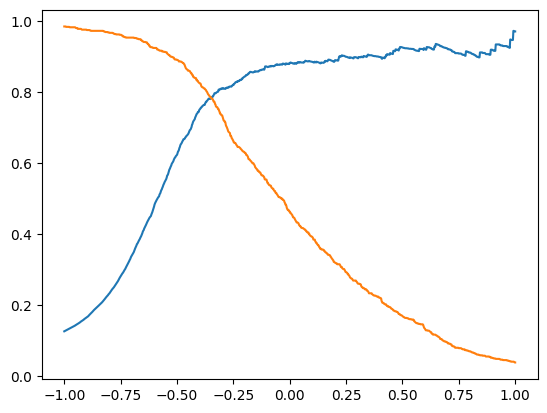

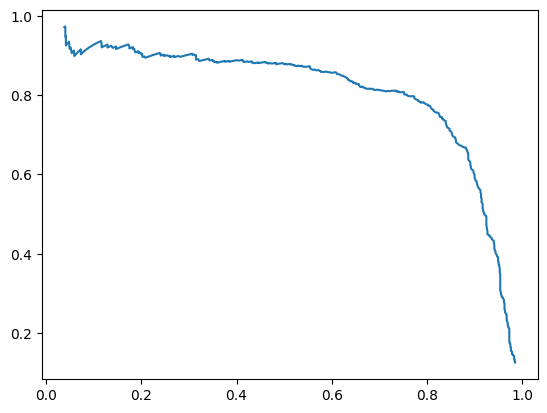

In [ ]:
precs = []
recalls = []
for th in np.linspace(-1, 1, 1000):
    pred = score > th
    p, r = precision_score(y_valid_5, pred), recall_score(y_valid_5, pred)
    precs.append(p)
    recalls.append(r)

plt.plot(np.linspace(-1, 1, 1000), precs)
plt.plot(np.linspace(-1, 1, 1000), recalls)
plt.show()
plt.plot(recalls, precs)

# 다중 분류의 성능 평가

In [ ]:
# accuracy - 다중분류에서는 의미가 있다.
model.fit(x_train, y_train)

RidgeClassifier()

In [ ]:
pred = model.predict(x_valid)
cm = confusion_matrix(y_valid, pred)
cm

array([[ 944,    0,    1,    2,    2,    7,   14,    2,    7,    1],
       [   0, 1107,    2,    2,    3,    1,    5,    1,   14,    0],
       [  18,   54,  813,   26,   15,    0,   42,   22,   37,    5],
       [   4,   17,   23,  880,    5,   17,    9,   21,   22,   12],
       [   0,   22,    6,    1,  881,    5,   10,    2,   11,   44],
       [  23,   18,    3,   72,   24,  659,   23,   14,   39,   17],
       [  18,   10,    9,    0,   22,   17,  875,    0,    7,    0],
       [   5,   40,   16,    6,   26,    0,    1,  884,    0,   50],
       [  14,   46,   11,   30,   27,   40,   15,   12,  759,   20],
       [  15,   11,    2,   17,   80,    1,    1,   77,    4,  801]])

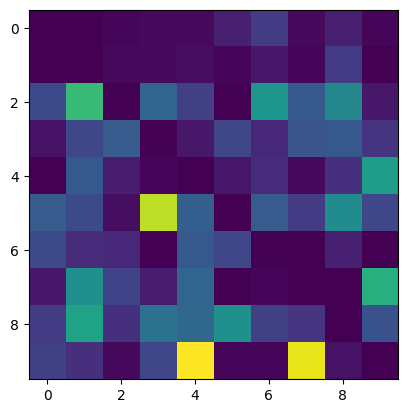

In [ ]:
np.fill_diagonal(cm, 0)
plt.imshow(cm)

<Axes: >

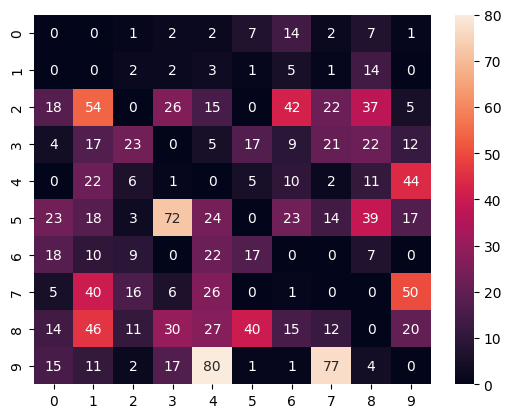

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

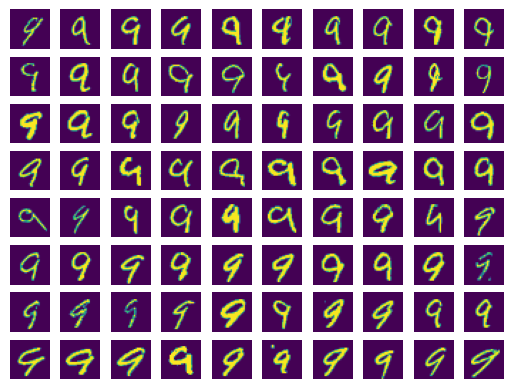

In [ ]:
# 9->4
cond1 = y_valid == 9
cond2 = pred == 4
f94 = x_valid[cond1 & cond2]
for i in range(80):
    plt.subplot(8, 10, i + 1)
    plt.axis('off')
    plt.imshow(f94[i].reshape(28, 28))

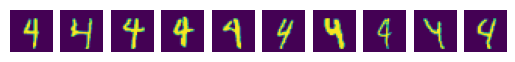

In [ ]:
cond1 = y_valid == 4
cond2 = pred == 9
f49 = x_valid[cond1 & cond2]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(f49[i].reshape(28, 28))

In [ ]:
(pred == y_valid).mean()

np.float64(0.8603)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls.fit(x_train[:10000], y_train[:10000])

RandomForestClassifier()

In [ ]:
#
pred = rf_cls.predict(x_valid)
(pred == y_valid).mean()

np.float64(0.9499)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
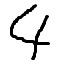

In [ ]:
import cv2
image = cv2.imread('test_4.jpg', cv2.IMREAD_GRAYSCALE)
image

In [ ]:
src = cv2.resize(image, (28, 28))
src = 255 - src
src

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   1,
          1,   0,   1,   1,   2,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   1,   1,  19,   9,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,
          2,   2, 185, 254, 126,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   1,   1,   0,
          1, 247, 254,  62,   0,   0,   1,   1,   0,   3,   0,   2,   3,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   2,   2,   2,  27, 219,
        253, 252,  40,   2,   2,   1,   1,   2,   1,   1,   3,   1,   3,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   1,   1,  50, 238, 252,
        169,   6,   1,   1,   1,   0,   2,   2,   2,   2,   4,   4,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   1,   1,  41, 121, 253, 197,  22,
          3,   0,   2,   1,   1,   0,   1,   2,  92, 231,   0,   1,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   1,  88, 252, 254, 107,   2,   0,
          0,   0,   0,   0,   0,   0,   2,   2, 226, 222,   2,   2,   1,
          0,   0],
       [  0,   0,   0,   0,   3,   0, 122, 254, 215,   1,   1,   1,   1,
          0,   0,   0,   0,   0,   0,   1, 109, 254,  18,   1,   3,   1,
          3,   0],
       [  0,   0,   0,   0,   1,  30, 254, 210,  40,   1,   1,   1,   0,
          1,   0,   0,   0,   0,   0,   0, 226, 255,   0,   0,   4,   1,
          1,   0],
       [  0,   0,   0,   0,   0, 235, 219,   2,   0,   0,   0,   0,   0,
          0,   0,   2,   1,   1,   4, 134, 255,  50,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 252, 170,   1,   0,   0,   0,   0,   0,
          0,   0,   2,   2,   2,   2, 248, 223,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1, 253,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   3,   4,   9, 236, 253,  56,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 254,   1,   0,   1,   3,   1,   0,   3,
          2,   1,   0,   1, 102, 253,  25,   3,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3, 255, 211, 132,   1,   1,   1,   1,   1,
          0,   2,   2,  17, 249, 217,   2,   4,   1,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,  21, 218, 246, 254, 255, 238,  48,   6,
          0,   0,   0,  68, 253,  70,   4,   1,   4,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  23, 109, 109, 210, 245, 164,
        146, 145, 142, 118, 255,   2,   1,   0,   0,   1,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   2,   0,   3,  61, 247,
        255, 252, 251, 255, 254, 253, 255, 255, 255, 255,  96,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   3,   1,   2,   1,   2,
          3,   0,  14, 254, 214, 144, 146, 146, 146, 146,  84,   2,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
          0,   5,   2, 254, 160,   2,   1,   1,   1,   1,   0,   1,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 254, 159,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  21, 253, 138,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 253,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          2,   3, 246, 238,   1,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
rf_cls.predict(src.reshape(1, 784)) #N, 784

array([4])

In [ ]:
import pickle
f = open('asdf.pickle', 'wb') #file handler
pickle.dump(rf_cls, f)
f.close()

# ------------------------

In [ ]:
rf_cls = pickle.load(open('asdf.pickle', 'rb'))

In [ ]:
rf_cls.predict(src.reshape(1, 784)) #N, 784

array([4])